### INTRODUCTION

## 

### BUSINESS UNDERSTANDING

##

### PROBLEM STATEMENT

##


### OBJECTIVES

##

## DATA UNDERSTANDING

### We are going to be using the data Twitter sentiments  about google and apple products  from CrowdFlower. This is the  [Link] to the data. The csv file contains  the following  variables

- `Tweet_text`: Tweet content
- `semotion_in_tweet_is_directed_at`: The type of device from which the twitter sentimnent was sent
- `emotion`: Emotion of the tweet ,the emotion is classifies as Negative, Positive ,no emotion  or a state where the person could not classify the emotion in the tween , labeled as "I can't tell"



## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer  
from nltk.stem import PorterStemmer  
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
import re
import sys
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import xgboost as xgb
#from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns



[nltk_data] Downloading package punkt to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Data

In [3]:
import pandas as pd
data = pd.read_csv('data\judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Cleaning

In [4]:
#droping the "emotion in tweet is directed at" column
data = data.drop('emotion_in_tweet_is_directed_at', axis=1)

In [5]:
# Checking if our dataset has missing values
data.isna().sum()
# Dropping the row with missing values

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [6]:
# we can not imout text
data = data.dropna()
#checking if the missing values have been dropped
data.isna().sum()


tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [7]:
# Handling duplicates
# Check if there are any duplicated values, drop them incase they are there and keep the first value

data['tweet_text'].duplicated().sum()

27

In [8]:
#remove duplicates
data = data.drop_duplicates(subset='tweet_text', keep='first')

In [9]:
#check if the duplicates have been dropped
data['tweet_text'].duplicated().sum()


0

In [10]:
# Renaming column and 'No emotion toward a brand or product' category
# Renaming'is_there_an_emotion_directed_at_a_brand_or_product'column to emotion to make it easy to work with

data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [11]:
# Previewing the first five rows to check if the column has been renamed.
data.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [12]:
# Renaming 'No emotion toward a brand or product' as neutral for easy analysis
data['emotion'] = data['emotion'].replace({'No emotion toward brand or product': 'Neutral'})

In [13]:
# Checking to see if the row has been renamed
data.emotion.value_counts()

Neutral             5372
Positive emotion    2968
Negative emotion     569
I can't tell         156
Name: emotion, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:ylabel='emotion'>

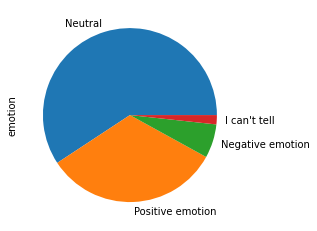

In [14]:
data["emotion"].value_counts().plot(kind="pie")

## Data Preprocessing

### *standardizing Case*
### Converting the Text Data in to lowercase

In [15]:
data["cleaned_tweet"] = data['tweet_text'].str.lower()
print (data['cleaned_tweet'][0])

#data['tweet_text'] = data['tweet_text'].str.replace('[^\w\s]','')

.@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.


### *Removing username From Tweets*
 ### We use the Regular Expression "\b\@\w*\w*\b" to take care of all the Twitter usernames in this tweet Text Coulumn. Below is a brief description of the Regex.
 - \b: This is a word boundary, meaning it will match the start or end of a word.

 - \: This is a literal colon.

 - \w*: This is a shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

 - \w*: This is another shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

In [16]:

data["cleaned_tweet"] = data["cleaned_tweet"].str.replace('\b\w*@\w*\w*\b','')
print(data["cleaned_tweet"][0])

.@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.


### *Removing Punctuation*
### We use the Regular Expression "[^\w\s]" to take care of all forms of puntuations in this tweet Text Coulumn. below is a brief description of the Regex.

1. []: This denotes a character class, which matches any single character that is included within the brackets.

2. ^: When placed at the beginning of a character class, the caret ^ negates the character class, meaning it will match any character that is not in the specified set.

3. \w: This is a shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

4. \s: This is another shorthand character class that matches any whitespace character, which includes spaces, tabs, and newlines.

Putting it all together, the regex pattern r'[^\w\s]' matches any character that is not a word character (like letters, digits, or underscores) and not a whitespace character. In other words, it will match punctuation marks and special symbols.

In [17]:
data['tweet_text'] = data['tweet_text'].str.replace('r[^\w\s]','')
print (data['tweet_text'][0])

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.


## Preprocessing seps
1. clean text by removing punctuations and special symbols
2. remove stop words
3. lemmatize words
4. tokenize words

In [38]:
## create a bag  of words

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_tweet'])
print(X.shape)
print(vectorizer.get_feature_names_out())

(9065, 9987)
['02' '03' '0310' ... 'ûó' 'ûólots' 'ûómention']


In [48]:
# tokenize word innthe entire dataset
data['tweet_tokens'] = data['cleaned_tweet'].apply(lambda x: nltk.word_tokenize(x))
print(data['tweet_tokens'][0])

['wesley83', 'i', 'have', 'a', '3g', 'iphone', 'after', '3', 'hrs', 'tweeting', 'at', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at']


In [49]:
def clean_text(text):
    # Ensure text is a string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

print(data['tweet_tokens'].apply(clean_text))


0       wesley83 i have a 3g iphone after 3 hrs tweeti...
1       jessedee know about fludapp awesome ipadiphone...
2       swonderlin can not wait for 2 also they should...
3       sxsw i hope this yeas festival isnt as crashy ...
4       sxtxstate great stuff on fri marissa mayer goo...
                              ...                        
9088                                 ipad everywhere link
9089    wave buzz rt mention we interrupt your regular...
9090    googles zeige a physician never reported poten...
9091    some verizon iphone customers complained their...
9092    ïïàü_êîòáââ_â_ûârt mention google tests ûïchec...
Name: tweet_tokens, Length: 9065, dtype: object


In [50]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
print(data['tweet_tokens'].apply(remove_stopwords))

0       [wesley83, 3g, iphone, 3, hrs, tweeting, dead,...
1       [jessedee, know, fludapp, awesome, ipadiphone,...
2                       [swonderlin, wait, 2, also, sale]
3       [sxsw, hope, yeas, festival, isnt, crashy, yea...
4       [sxtxstate, great, stuff, fri, marissa, mayer,...
                              ...                        
9088                             [ipad, everywhere, link]
9089    [wave, buzz, rt, mention, interrupt, regularly...
9090    [googles, zeige, physician, never, reported, p...
9091    [verizon, iphone, customers, complained, time,...
9092    [ïïàü_êîòáââ_â_ûârt, mention, google, tests, û...
Name: tweet_tokens, Length: 9065, dtype: object


In [51]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens
print(data['tweet_tokens'].apply(lemmatize_text))

0       [wesley83, i, have, a, 3g, iphone, after, 3, h...
1       [jessedee, know, about, fludapp, awesome, ipad...
2       [swonderlin, can, not, wait, for, 2, also, the...
3       [sxsw, i, hope, this, yea, festival, isnt, a, ...
4       [sxtxstate, great, stuff, on, fri, marissa, ma...
                              ...                        
9088                             [ipad, everywhere, link]
9089    [wave, buzz, rt, mention, we, interrupt, your,...
9090    [google, zeige, a, physician, never, reported,...
9091    [some, verizon, iphone, customer, complained, ...
9092    [ïïàü_êîòáââ_â_ûârt, mention, google, test, ûï...
Name: tweet_tokens, Length: 9065, dtype: object


In [63]:
def processed_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    return ' '.join(tokens)
data['cleaned_tweet_tokens'] = data['tweet_text'].apply(processed_text)
print(data['cleaned_tweet_tokens'][0])


wesley83 3g iphone 3 hr tweeting dead need upgrade plugin station


In [64]:
print(data.head())

                                          tweet_text           emotion  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  Negative emotion   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  Positive emotion   
2  @swonderlin Can not wait for #iPad 2 also. The...  Positive emotion   
3  @sxsw I hope this yeas festival isn't as crash...  Negative emotion   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  Positive emotion   

                                       cleaned_tweet  \
0  wesley83 i have a 3g iphone after 3 hrs tweeti...   
1  jessedee know about fludapp  awesome ipadiphon...   
2  swonderlin can not wait for  2 also they shoul...   
3  sxsw i hope this yeas festival isnt as crashy ...   
4  sxtxstate great stuff on fri  marissa mayer go...   

                                     tokenized_tweet  \
0  [wesley83, i, have, a, 3g, iphone, after, 3, h...   
1  [jessedee, know, about, fludapp, awesome, ipad...   
2  [swonderlin, can, not, wait, for, 2, also, the.

In [70]:
#retain only the columns that we need, the cleaned tweet tokens and the emotion

data_processed = data[['cleaned_tweet_tokens', 'emotion']]
print(data_processed.head())

                                cleaned_tweet_tokens           emotion
0  wesley83 3g iphone 3 hr tweeting dead need upg...  Negative emotion
1  jessedee know fludapp awesome ipadiphone app y...  Positive emotion
2                        swonderlin wait 2 also sale  Positive emotion
3  sxsw hope yea festival isnt crashy yea iphone app  Negative emotion
4  sxtxstate great stuff fri marissa mayer google...  Positive emotion


In [72]:
#testtrain split
train, test = train_test_split(data_processed, test_size=0.4, random_state=42)
print(train.shape)
print(test.shape)

(5439, 2)
(3626, 2)


In [73]:
#appliying the tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train['cleaned_tweet_tokens'])
y_train = train['emotion']
X_test_tfidf = vectorizer.transform(test['cleaned_tweet_tokens'])
y_test = test['emotion']



In [74]:
#fitting the model
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [75]:
#prediction
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        51
Negative emotion       0.75      0.01      0.03       232
         Neutral       0.65      0.95      0.77      2198
Positive emotion       0.67      0.23      0.35      1145

        accuracy                           0.65      3626
       macro avg       0.52      0.30      0.29      3626
    weighted avg       0.66      0.65      0.58      3626



c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [76]:
#evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Naive Bayes):", accuracy)

Accuracy (Naive Bayes): 0.6530612244897959
